# EXPLORATION 02
## | 프로젝트 (1) load_digits 손글씨 분류

### | 프로젝트 학습 과정

1. 필요한 모듈 import 하기
2. 데이터 준비 및 데이터 이해
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기
3. train, test 데이터 분리
4. 다양한 모델로 학습 시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- logistic Regression 사용해 보기
5. 모델 평가
- sklearn.metrics에서 제공하는 평가지표 중 적절한 것 선택
- 선택 이유

## 1. 프로젝트 (1) load_digits

### Data info
1. Classes: 10
2. Samples per class: ~180
3. Samples total: 1797
4. Dimensionality: 64
5. Features: integers 0-16

## 1_1. 필요한 모듈 import 하기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## 1_2. 데이터 준비 및 이해


In [5]:
digits = load_digits()
digits_data = digits.data # x_data
digits_label = digits.target # y_data
digits_data.shape

(1797, 64)

In [6]:
digits_label.shape

(1797,)

In [7]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [10]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
digits.data[0].shape

(64,)

In [12]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
# label 확인
digits_label

array([0, 1, 2, ..., 8, 9, 8])

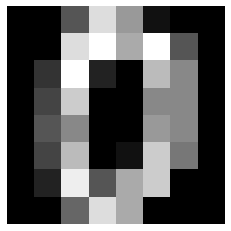

In [14]:
# 이미지 확인
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

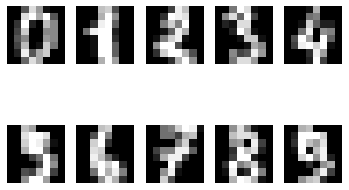

In [15]:
# target을 (2x5) 행렬로 여러 개 이미지 확인
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

## 1_3. train, text 데이터 분리

In [16]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.3,
                                                   random_state=32)

## 1_4. 모델 학습

### 1_4_(1) Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [18]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [19]:
Decision_pred = decision_tree.predict(X_test)
Decision_pred

array([3, 9, 4, 4, 7, 3, 8, 6, 1, 1, 1, 0, 5, 8, 3, 0, 6, 3, 9, 7, 3, 2,
       2, 7, 4, 4, 3, 9, 5, 1, 0, 3, 0, 1, 1, 4, 5, 9, 6, 5, 6, 5, 6, 9,
       1, 6, 8, 8, 5, 5, 5, 3, 7, 7, 5, 1, 6, 3, 2, 9, 6, 3, 3, 1, 8, 4,
       3, 7, 3, 6, 4, 4, 0, 7, 0, 8, 0, 6, 3, 6, 3, 0, 0, 7, 3, 0, 7, 3,
       5, 7, 3, 6, 1, 6, 0, 3, 9, 3, 0, 5, 9, 0, 4, 2, 9, 3, 8, 2, 9, 1,
       3, 6, 3, 9, 0, 0, 5, 5, 2, 7, 0, 0, 7, 7, 1, 5, 7, 8, 0, 3, 0, 7,
       3, 3, 9, 9, 0, 7, 8, 2, 1, 8, 2, 0, 6, 5, 3, 1, 9, 0, 6, 6, 3, 1,
       4, 8, 8, 0, 5, 1, 3, 0, 7, 0, 3, 9, 5, 8, 3, 9, 3, 3, 6, 2, 1, 2,
       2, 7, 0, 7, 9, 5, 6, 9, 4, 1, 9, 3, 9, 6, 5, 1, 2, 9, 0, 9, 5, 9,
       1, 7, 1, 4, 2, 0, 5, 7, 0, 1, 4, 6, 4, 1, 3, 9, 3, 2, 3, 1, 3, 1,
       9, 9, 1, 9, 2, 6, 4, 2, 5, 6, 5, 7, 6, 8, 9, 4, 0, 3, 2, 7, 7, 0,
       2, 4, 6, 3, 7, 4, 1, 5, 8, 1, 0, 7, 9, 5, 9, 6, 1, 3, 5, 2, 0, 3,
       5, 4, 8, 7, 3, 9, 4, 4, 5, 0, 3, 9, 1, 8, 2, 8, 2, 9, 1, 7, 7, 8,
       8, 1, 5, 1, 0, 3, 6, 7, 2, 0, 1, 5, 2, 1, 6,

In [20]:
accuracy = accuracy_score(y_test, Decision_pred)
accuracy

0.8703703703703703

### 1_4_(2) Random Forest 사용해 보기

In [21]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
Random_pred = random_forest.predict(X_test)

print(classification_report(y_test, Random_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.96      0.98      0.97        56
           2       0.96      1.00      0.98        45
           3       0.99      0.99      0.99        74
           4       0.98      0.96      0.97        52
           5       0.98      0.98      0.98        58
           6       1.00      0.98      0.99        58
           7       0.93      0.98      0.95        53
           8       0.97      0.90      0.94        40
           9       0.98      0.96      0.97        56

    accuracy                           0.98       540
   macro avg       0.98      0.97      0.97       540
weighted avg       0.98      0.98      0.98       540



### 1_4_(3) SVM 사용해 보기

In [22]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [23]:
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        74
           4       1.00      0.96      0.98        52
           5       1.00      0.98      0.99        58
           6       1.00      1.00      1.00        58
           7       0.98      1.00      0.99        53
           8       0.95      1.00      0.98        40
           9       0.98      0.98      0.98        56

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### 1_4_(4) SGD Classifier 사용해 보기

In [24]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [25]:
sgd_model.fit(X_train, y_train)
sgd_pred = sgd_model.predict(X_test)

print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.82      0.98      0.89        56
           2       0.98      1.00      0.99        45
           3       1.00      0.95      0.97        74
           4       1.00      0.94      0.97        52
           5       0.98      0.90      0.94        58
           6       0.97      0.98      0.97        58
           7       1.00      0.92      0.96        53
           8       0.94      0.72      0.82        40
           9       0.81      1.00      0.90        56

    accuracy                           0.94       540
   macro avg       0.95      0.94      0.94       540
weighted avg       0.95      0.94      0.94       540



### 1_4_(5) logistic Regression 사용해 보기

In [26]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [27]:
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        48
           1       0.98      0.98      0.98        56
           2       0.98      1.00      0.99        45
           3       1.00      0.99      0.99        74
           4       1.00      0.96      0.98        52
           5       0.95      0.97      0.96        58
           6       1.00      0.98      0.99        58
           7       1.00      1.00      1.00        53
           8       0.91      1.00      0.95        40
           9       0.95      0.98      0.96        56

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 1_5. 모델 평가
- [sklearn.metrics 평가 지표에 대한 설명](https://velog.io/@cha-suyeon/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-sklearn.metrics-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C)

### Data info
1. Classes: 10
2. Samples per class: ~180
3. Samples total: 1797
4. Dimensionality: 64
5. Features: integers 0-16

#### 1) 학습 방법
- Machine Learning을 이용하여 분류기(Classifier)를 만들어서 0~9까지의 숫자 손글씨를 분류, 예측하였음
- 5개의 모델을 사용하였고, 학습 데이터 70%, 테스트 데이터 30%로 나누어 훈련시키고 분류기 모델을 검증하였음

#### 2) 선택한 평가 지표
- recall

#### 3) 선택 이유
-  digits dataset은 정수 0~9까지 10개의 분류 값이 있으므로 FP보다 FN을 낮춰 정확도를 더 높이는 것이 중요하다고 생각함

#### 4) 분류 결과


||model|recall-weighted avg|
|------|---|---|
|0|Decision Tree|0.87|
|1|Random Forest|0.98|
|2|Svm|0.99|
|3|SGD Classifier|0.97|
|4|Logistic Regression|0.98|

#### 5. 결과 요약
- svm이 0.99로 가장 성능이 좋음
- 대체로 다 높은 성능이 나왔음
- Decision Tree가 가장 정확도가 떨어짐

#### 6. 결과 해석
- 0~9까지 클래스를 가진 다중 클래스 분류였기 때문에 Random Forest가 가장 높을 것이라 예측하였음
- SVM(서포트 벡터 머신)은 Classification 문제에서 결정 경계(Decision Boundary)를 효율적으로 찾는 방법을 제공함
- SVM은 대용량의 데이터셋에 확장되기 어렵고 이미비 분류 같은 지각에 관련된 문제에서 좋은 성능을 내지 못하지만, 1797개의 중간 크기에 특성이 많아 복잡한 데이터셋을 분류하여 성능이 높게 나온 것으로 추측한다.